🔹 Total Variance Retained: 0.8473
🔹 Number of PCA Components Used: 5
 SVM Accuracy (Original Features): 0.9561
 SVM Accuracy (PCA Features): 0.9825


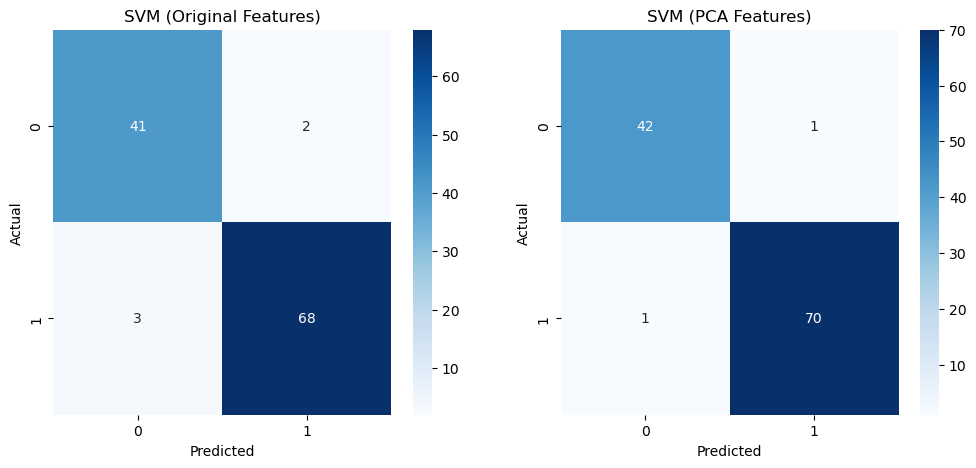

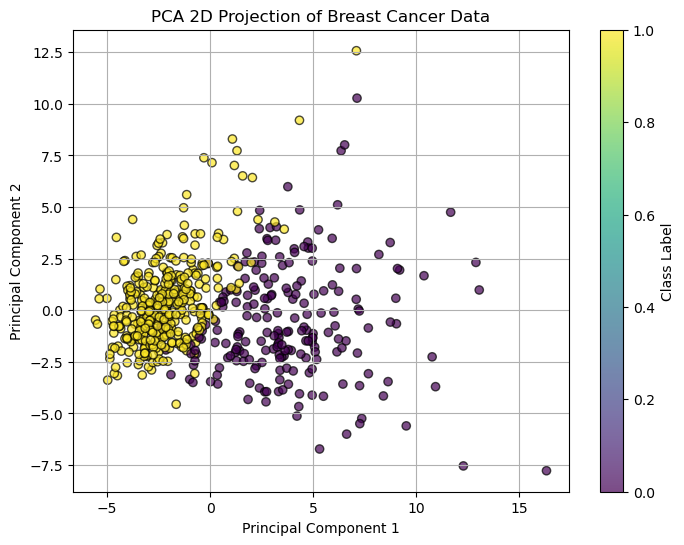

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=["target"]))
y = df["target"]
pca = PCA(n_components=0.80)  
X_pca = pca.fit_transform(X_scaled)

explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"🔹 Total Variance Retained: {explained_variance:.4f}")
print(f"🔹 Number of PCA Components Used: {pca.n_components_}")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.2, random_state=42)

svm_original = SVC(kernel="linear")
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

svm_pca = SVC(kernel="linear")
svm_pca.fit(X_pca_train, y_train)
y_pred_pca = svm_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f" SVM Accuracy (Original Features): {accuracy_original:.4f}")
print(f" SVM Accuracy (PCA Features): {accuracy_pca:.4f}")

conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("SVM (Original Features)")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_pca, annot=True, fmt="d", cmap="Blues", ax=axes[1])
axes[1].set_title("SVM (PCA Features)")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()

if pca.n_components_ >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha=0.7, edgecolors="k")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA 2D Projection of Breast Cancer Data")
    plt.colorbar(label="Class Label")
    plt.grid(True)
    plt.show()
